In [1]:
# The necessary libraries for the code
import pandas as pd
import numpy as np

In [57]:
train = pd.read_csv("wine-data-project-train.csv")
test = pd.read_csv("wine-data-project-test.csv")

In [58]:
train.shape, test.shape

((400, 12), (70, 12))

In [59]:
print(train.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.1              0.16         0.44             2.5      0.068   
1            8.3              0.60         0.25             2.2      0.118   
2            8.3              0.85         0.14             2.5      0.093   
3            6.8              0.48         0.08             1.8      0.074   
4            6.6              0.64         0.31             6.1      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   17                  31.0  0.99328  3.35       0.54   
1                    9                  38.0  0.99616  3.15       0.53   
2                   13                  54.0  0.99724  3.36       0.54   
3                   40                  64.0  0.99529  3.12       0.49   
4                    7                  49.0  0.99718  3.35       0.68   

   alcohol  Quality  
0     12.4        1  
1      9.8       -1  
2     10.1       -1 

In [60]:
print(test.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.6              0.49         0.33             1.9      0.074   
1            6.2              0.56         0.09             1.7      0.053   
2            7.5              0.38         0.57             2.3      0.106   
3            7.5              0.77         0.20             8.1      0.098   
4            8.2              0.24         0.34             5.1      0.062   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   27                    85  0.99706  3.41       0.58   
1                   24                    32  0.99402  3.54       0.60   
2                    5                    12  0.99605  3.36       0.55   
3                   30                    92  0.99892  3.20       0.58   
4                    8                    22  0.99740  3.22       0.94   

   alcohol  Quality  
0      9.0       -1  
1     11.3       -1  
2     11.4        1 

In [61]:
train.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Quality                 0
dtype: int64

In [62]:
test.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Quality                 0
dtype: int64

# KNN Implementation

In [8]:
def distance(x_train, x_test_i):
    return np.sqrt( np.sum( np.square(x_train -x_test_i), axis=1)  )


def get_k_sorted_indices(distances, k):
    return pd.Series(distances).sort_values().reset_index()["index"][:k]


def predict_class(y_train, sorted_indices):
    return y_train[sorted_indices].mode()


def knn(x_train, y_train, x_test, k=3):
    return pd.Series([ predict_class(y_train, get_k_sorted_indices(distance(x_train,  x_test_i), k)).values[0] \
                       for x_test_i in x_test.values])

def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/ len(y_test)

testing it on single values

In [9]:
distances=  distance(train.iloc[:, :-1], test.iloc[15, :-1])

In [13]:
sorted_indices = get_k_sorted_indices( distances, 2)

In [14]:
class_val = predict_class(train.iloc[:, -1] , sorted_indices)

In [15]:
y_pred = knn(train.iloc[:, :-1], train.iloc[:, -1] , test.iloc[:, :-1] , k=4  )

In [16]:
class_val.values

array([1], dtype=int64)

In [17]:
accuracy(y_pred, test.iloc[:, -1]) 

0.5142857142857142

In [18]:
 pd.Series([ 1, 2, 3, 4] )

0    1
1    2
2    3
3    4
dtype: int64

In [19]:
allresults = []
for k in range(2, 40, 2):
    allresults.append(accuracy( knn(train.iloc[:, :-1], train.iloc[:, -1] , test.iloc[:, :-1] , k=k)\
                                   ,test.iloc[:, -1]))

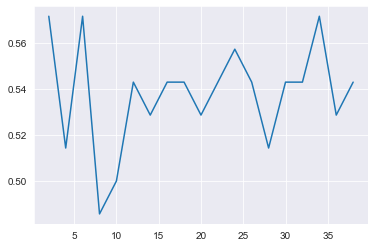

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

plt.plot(list(range(2, 40, 2)), allresults)

### Altering the predict class function to consider the inverse distance

In [22]:
def distance(x_train, x_test_i):
    return np.sqrt( np.sum( np.square(x_train -x_test_i), axis=1)  )


def get_k_sorted_indices(distances, k):
    return pd.Series(distances).sort_values().reset_index()["index"][:k]


def predict_class(y_train, sorted_indices, distances):
    classes = y_train.unique()
    class_weight = { class_ : 0 for class_ in classes   }
    for index in sorted_indices:
        for class_ in classes:
            if y_train[index] == class_:
                class_weight[class_] += 1/(distances[index] * distances[index])
    
    return max(class_weight, key=class_weight.get)
    


def knn(x_train, y_train, x_test, k=3):
    return pd.Series([ predict_class(y_train, get_k_sorted_indices(distance(x_train,  x_test_i), k),\
                                     distance(x_train,  x_test_i))\
                                     for x_test_i in x_test.values])

def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/ len(y_test)

In [23]:
distances=  distance(train.iloc[:, :-1], test.iloc[15, :-1])

In [24]:
sorted_indices = get_k_sorted_indices( distances, 2)

In [25]:
class_val = predict_class(train.iloc[:, -1] , sorted_indices, distances)

In [26]:
class_val

1

In [27]:
y_pred = knn(train.iloc[:, :-1], train.iloc[:, -1] , test.iloc[:, :-1] , k=4  )

c:\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


In [28]:
accuracy(y_pred, test.iloc[:, -1])

0.6142857142857143

c:\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


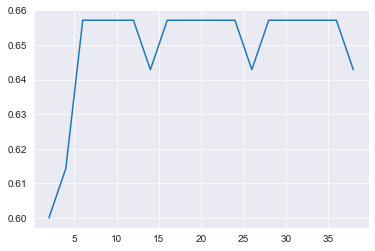

In [29]:
allresults = []
for k in range(2, 40, 2):
    allresults.append(accuracy( knn(train.iloc[:, :-1], train.iloc[:, -1] , test.iloc[:, :-1] , k=k)\
                                   ,test.iloc[:, -1]))
    
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

plt.plot(list(range(2, 40, 2)), allresults)

## Changing the distance function from Euclidean to Manhatten

In [30]:
def calculateManhattenDistances(x_train, x_test_i):
    return  np.sum( np.abs(x_train -x_test_i), axis=1)  


def get_k_sorted_indices(distances, k):
    return pd.Series(distances).sort_values().reset_index()["index"][:k]


def predict_class(y_train, sorted_indices, distances):
    classes = y_train.unique()
    class_weight = { class_ : 0 for class_ in classes   }
    for index in sorted_indices:
        for class_ in classes:
            if y_train[index] == class_:
                class_weight[class_] += 1/(distances[index] * distances[index])
    
    return max(class_weight, key=class_weight.get)
    


def knn(x_train, y_train, x_test, k=3):
    return pd.Series([ predict_class(y_train, get_k_sorted_indices(calculateManhattenDistances(x_train,  x_test_i), k),\
                                     distance(x_train,  x_test_i))\
                                     for x_test_i in x_test.values])

def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/ len(y_test)

c:\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


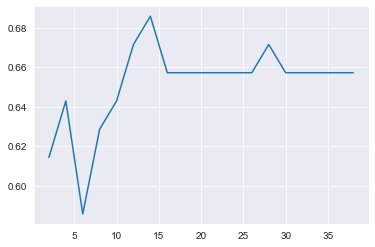

In [31]:
allresults = []
for k in range(2, 40, 2):
    allresults.append(accuracy( knn(train.iloc[:, :-1], train.iloc[:, -1] , test.iloc[:, :-1] , k=k)\
                                   ,test.iloc[:, -1]))
    
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

plt.plot(list(range(2, 40, 2)), allresults)

In [32]:
train.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'Quality'], dtype=object)

## Normalization and z score normalization

In [63]:
def normalization(data_in):
    """
    """
    data = data_in.copy()
    for column in data.columns.values:
        data[column] = (data[column] - data[column].min())/ (data[column].max() - data[column].min() )
    return data


def zscore_normalization(data_in):
    """
    """
    data = data_in.copy()
    for column in data.columns.values:
        data[column] = (data[column] - data[column].mean())/data[column].std()
    return data

In [64]:
data = pd.concat([train, test], axis = 0)

In [65]:
norm_data = normalization(data)
zcore_data = zscore_normalization(data)

In [66]:
norm_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,0.358854,0.284088,0.247327,0.118797,0.120441,0.211933,0.251551,0.459459,0.416306,0.254617,0.372328,0.491489
std,0.157027,0.126593,0.211341,0.118252,0.110283,0.160198,0.194445,0.125286,0.126584,0.140652,0.181297,0.500460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.261538,0.190141,0.051282,0.069231,0.079576,0.086957,0.098039,0.393117,0.345133,0.164948,0.218182,0.000000
50%,0.338462,0.288732,0.237179,0.092308,0.103448,0.173913,0.196078,0.466397,0.415929,0.237113,0.345455,0.000000
75%,0.446154,0.359155,0.384615,0.115385,0.127321,0.304348,0.366013,0.531984,0.477876,0.309278,0.490909,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
zcore_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
count,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02,4.700000e+02
mean,-3.647201e-16,-8.692810e-17,-1.285024e-16,1.285024e-16,-9.448707e-17,1.058255e-16,6.047172e-17,2.687590e-14,-5.113640e-15,1.247229e-16,-8.409349e-16,5.291276e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.285308e+00,-2.244101e+00,-1.170273e+00,-1.004605e+00,-1.092116e+00,-1.322943e+00,-1.293688e+00,-3.667289e+00,-3.288775e+00,-1.810261e+00,-2.053693e+00,-9.820747e-01
25%,-6.197411e-01,-7.421157e-01,-9.276225e-01,-4.191565e-01,-3.705547e-01,-7.801379e-01,-7.894863e-01,-5.295226e-01,-5.622600e-01,-6.375211e-01,-8.502408e-01,-9.820747e-01
50%,-1.298684e-01,3.669153e-02,-4.801386e-02,-2.240069e-01,-1.540865e-01,-2.373329e-01,-2.852850e-01,5.537518e-02,-2.974921e-03,-1.244476e-01,-1.482267e-01,-9.820747e-01
75%,5.559535e-01,5.929824e-01,6.496068e-01,-2.885723e-02,6.238175e-02,5.768748e-01,5.886640e-01,5.788749e-01,4.863995e-01,3.886259e-01,6.540751e-01,1.016086e+00
max,4.083037e+00,5.655230e+00,3.561415e+00,7.451879e+00,7.975499e+00,4.919315e+00,3.849166e+00,4.314465e+00,4.611127e+00,5.299472e+00,3.462131e+00,1.016086e+00


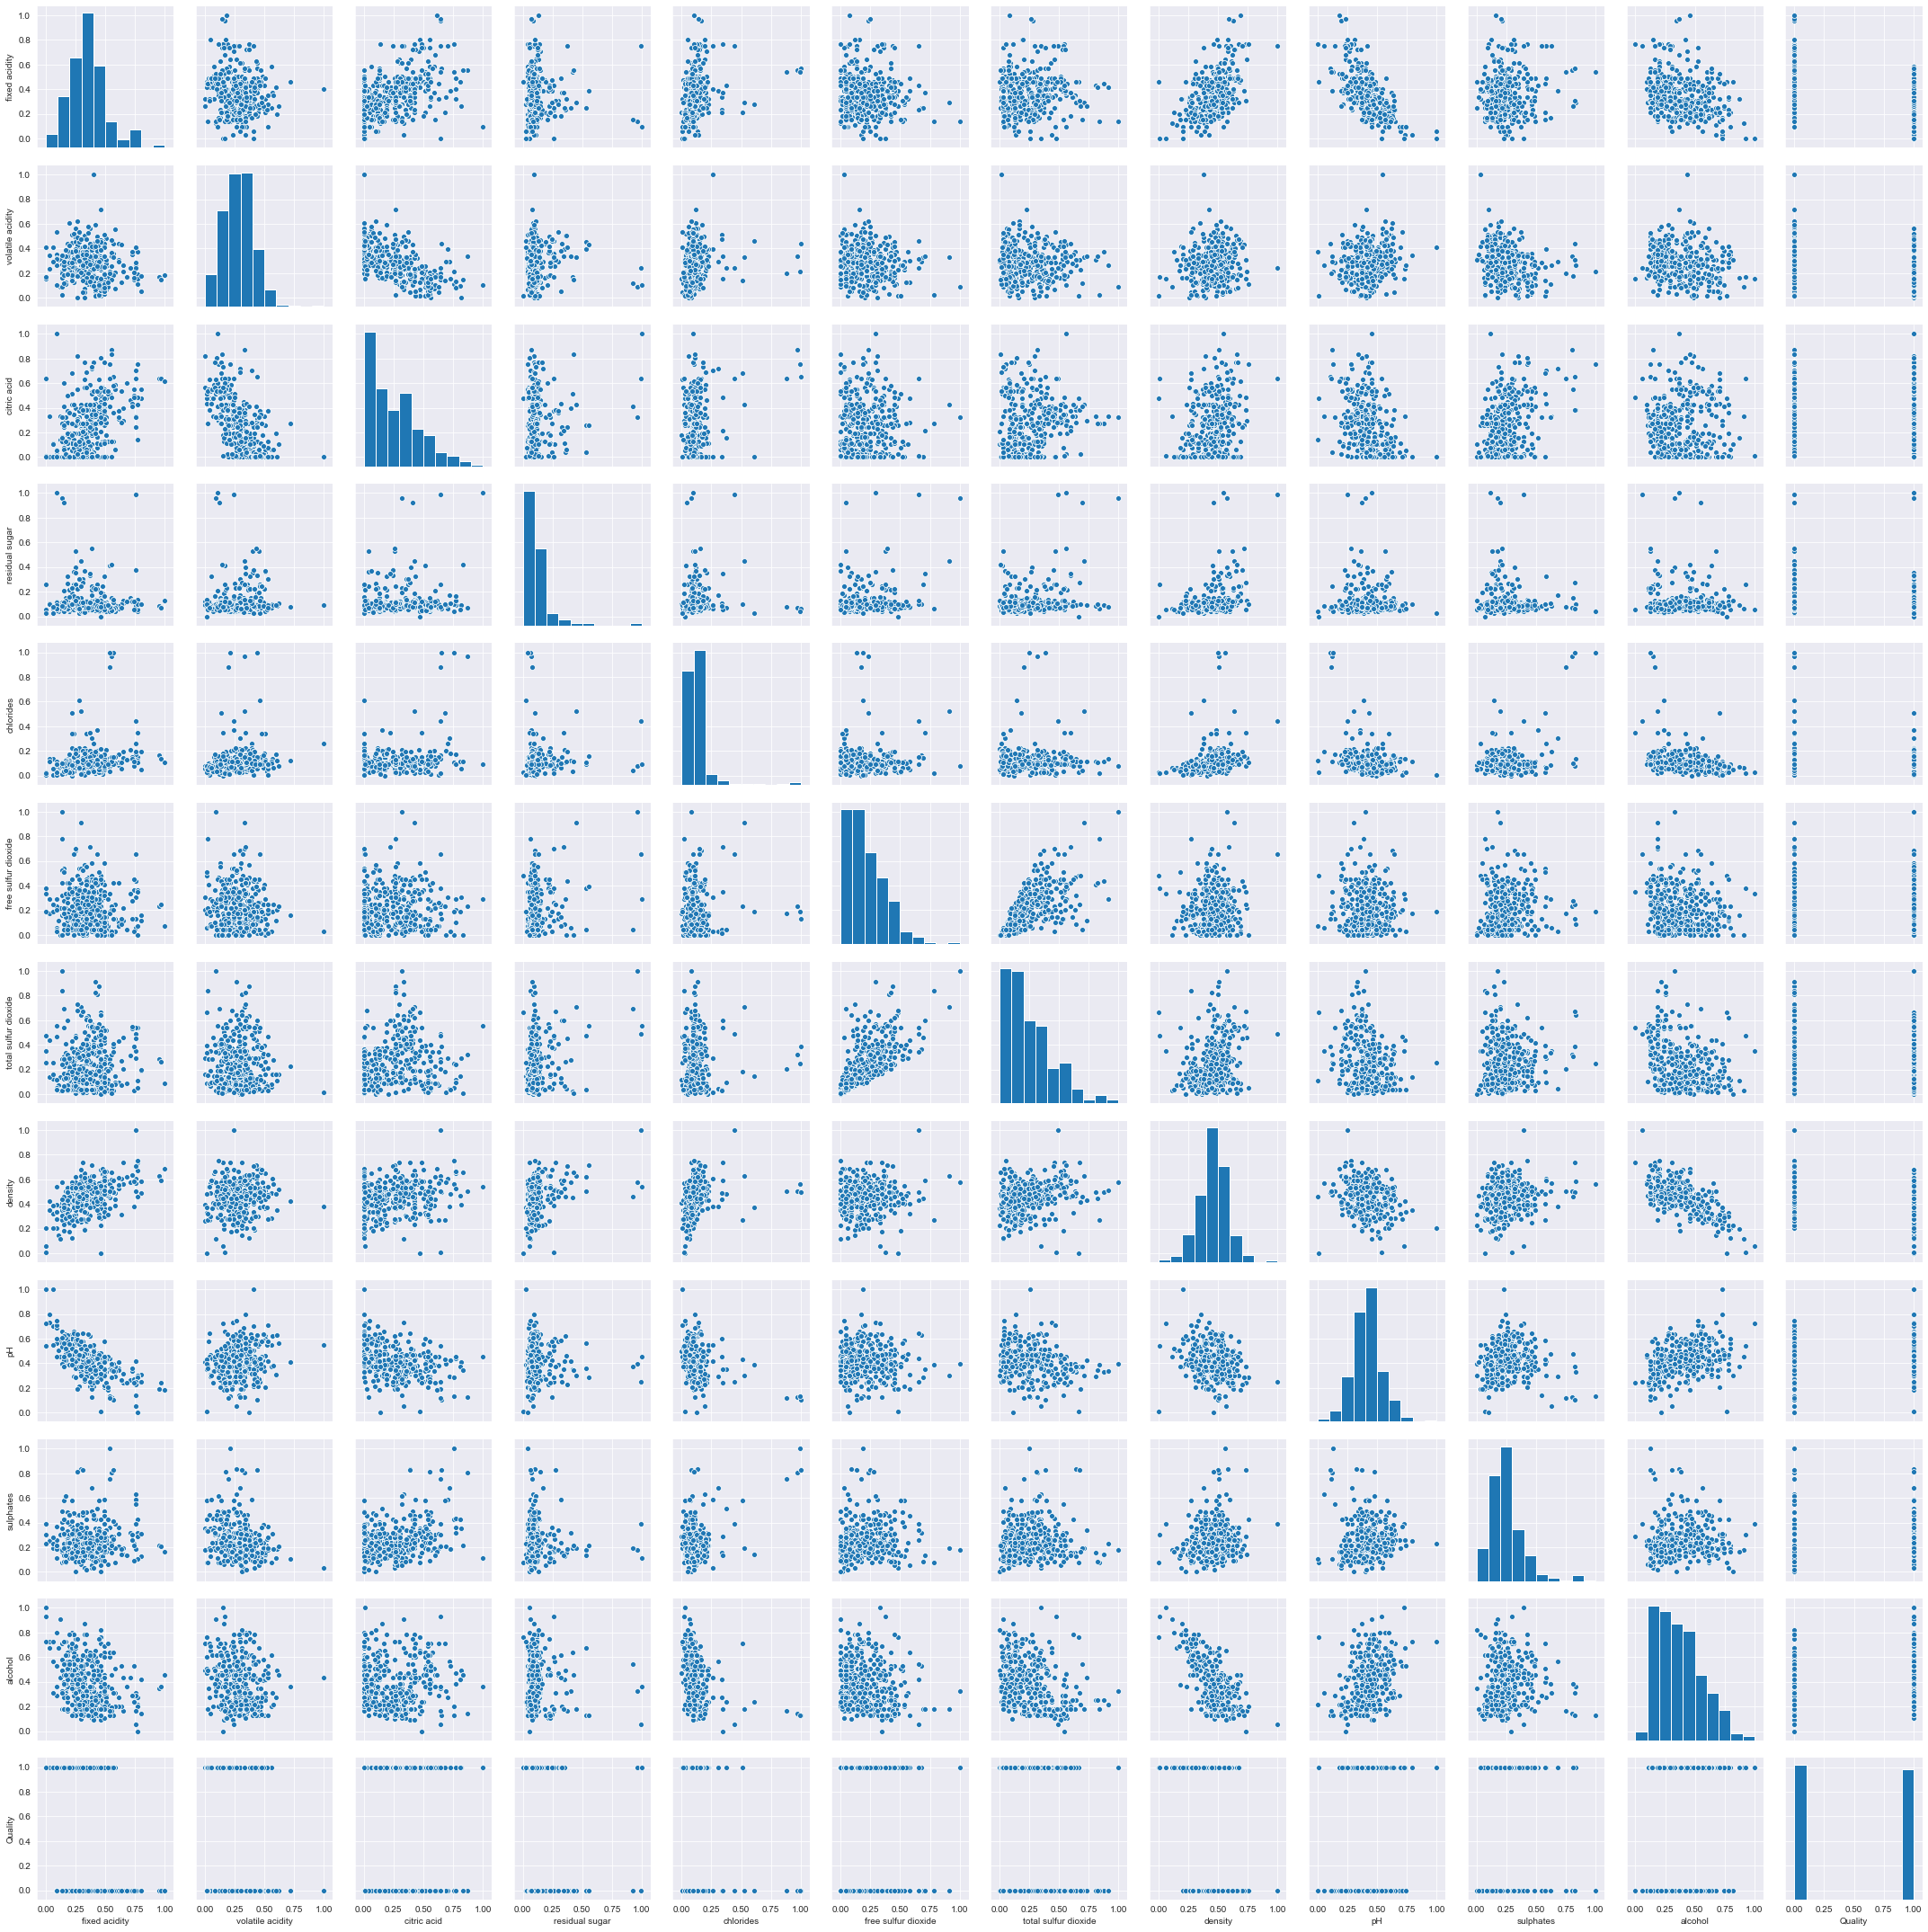

In [68]:
sns.pairplot(norm_data)

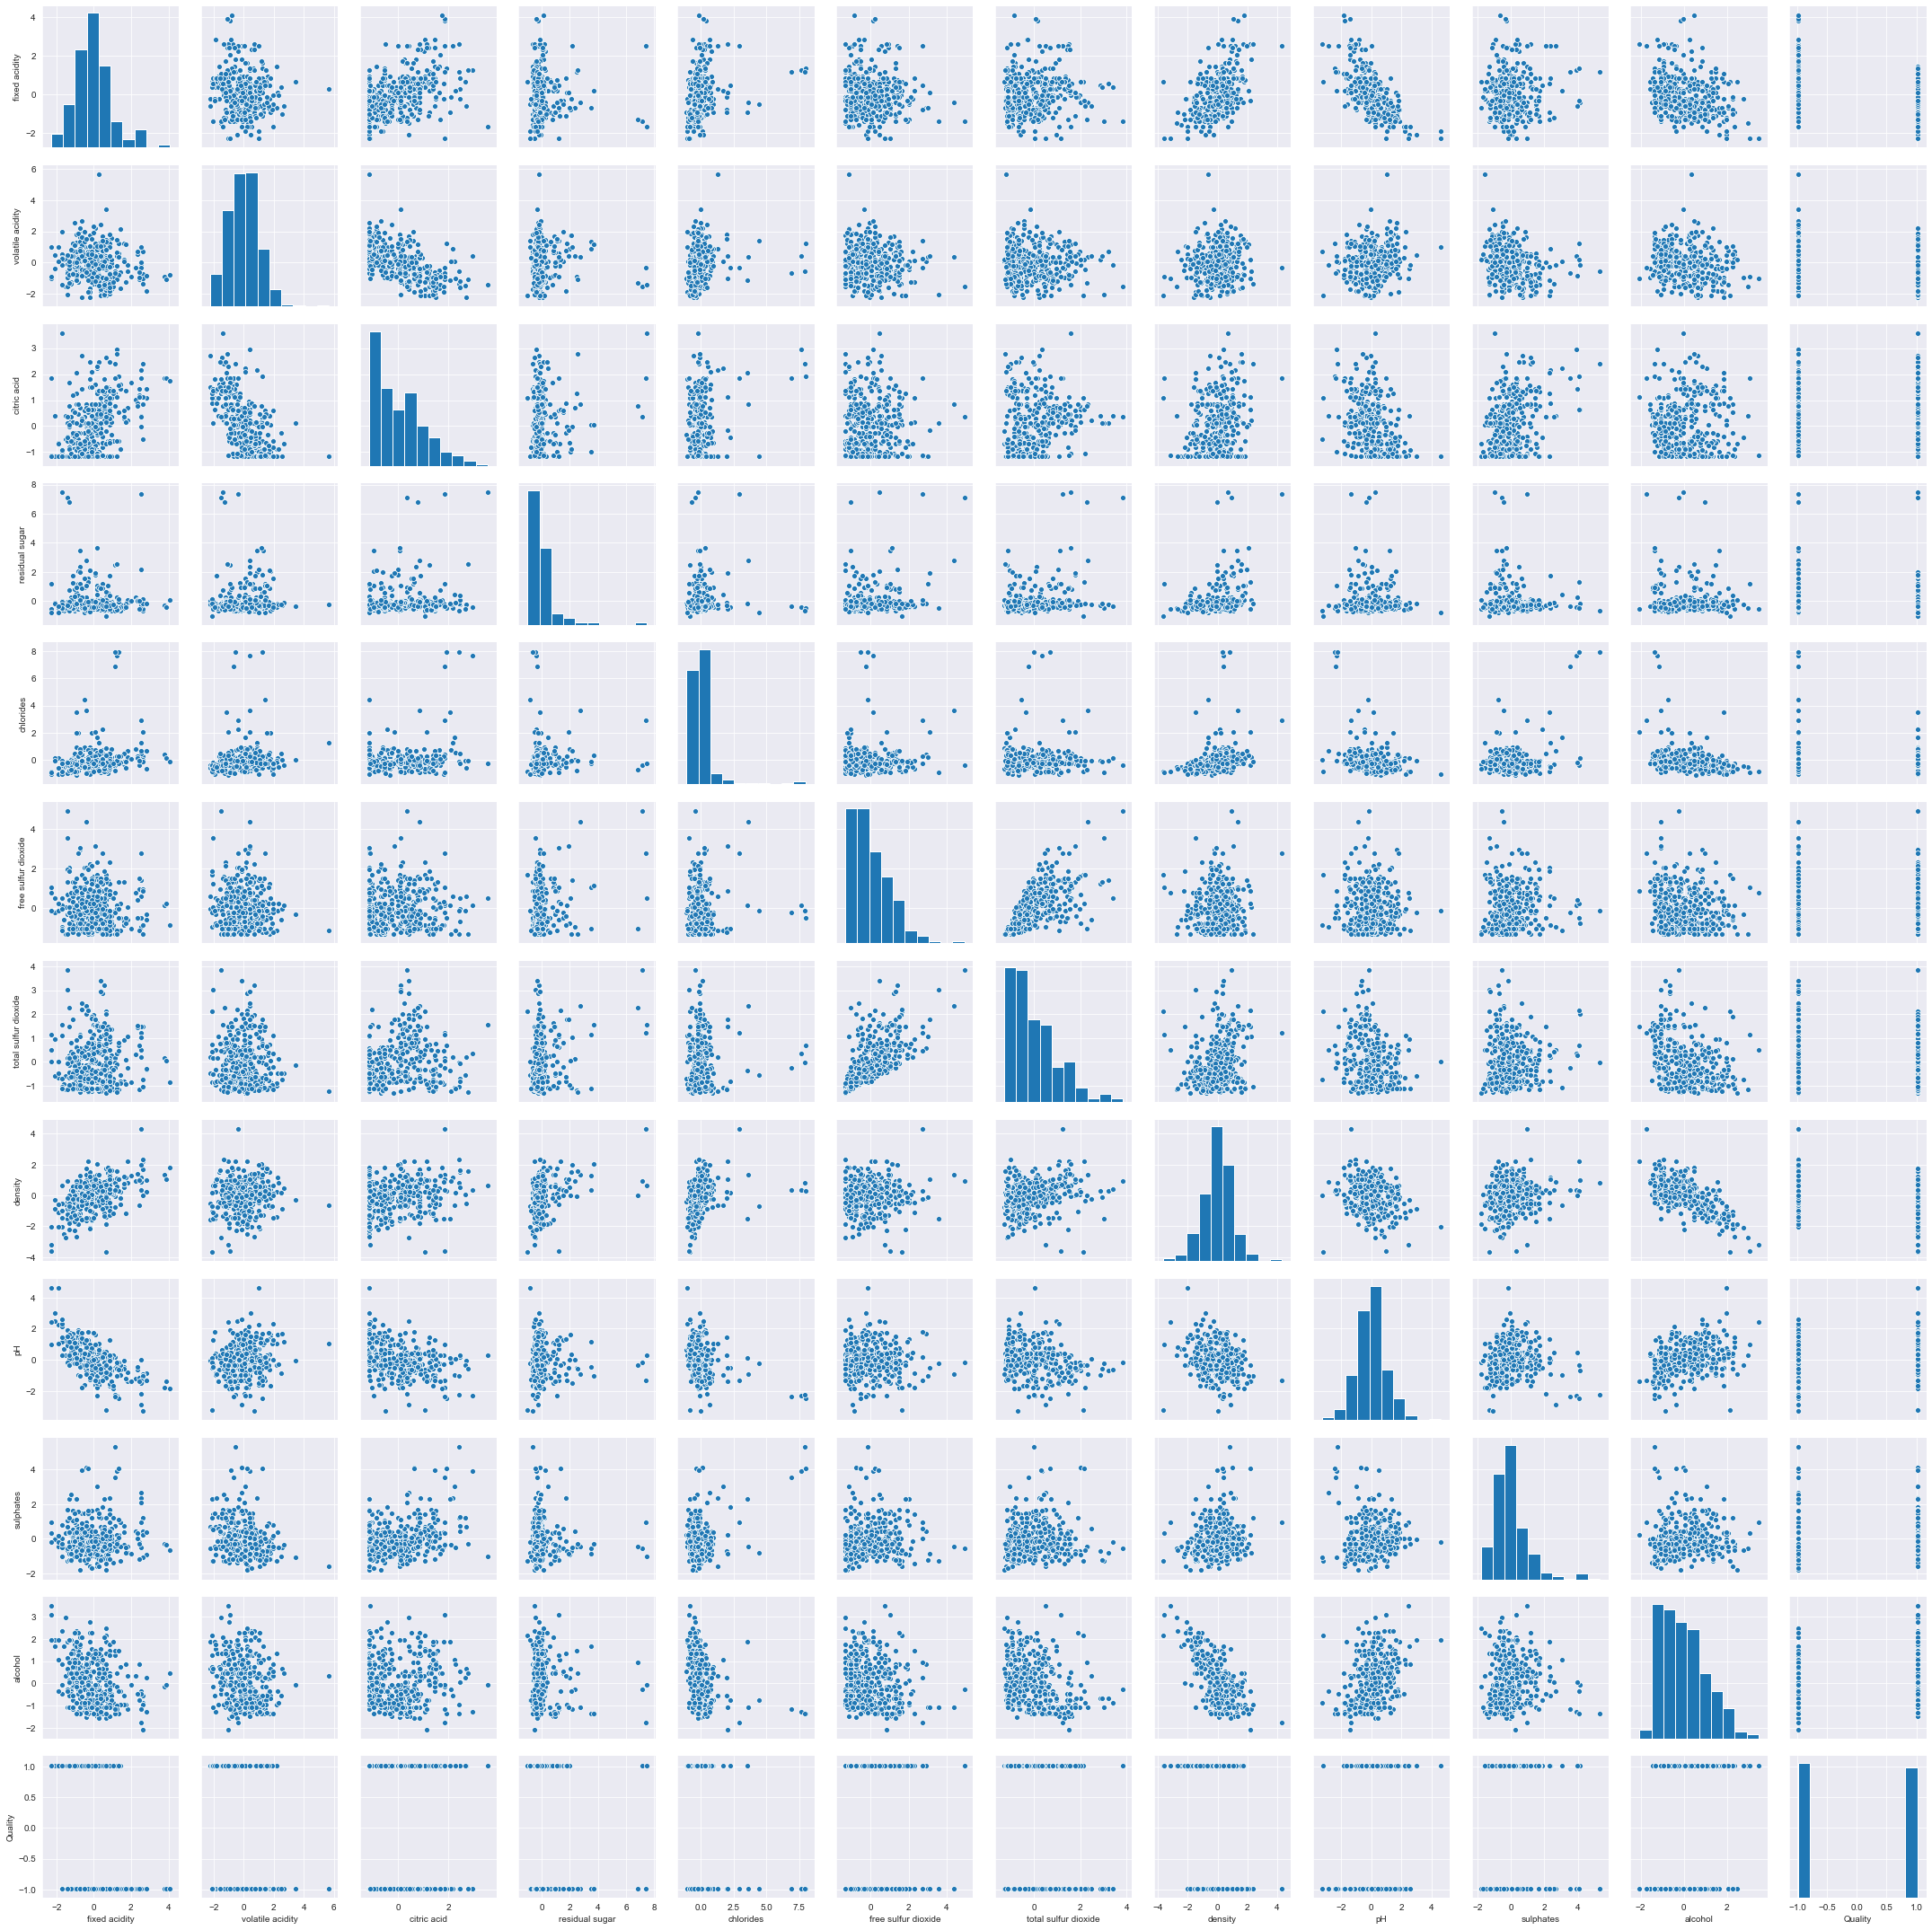

In [69]:
sns.pairplot(zcore_data)

# Using the normalized and zscore standardized data

In [72]:
train = data.iloc[:400, :]
test = data.iloc[400:,: ]

## Case 1

In [76]:
train = norm_data.iloc[:400, :]
test = norm_data.iloc[400:,: ]

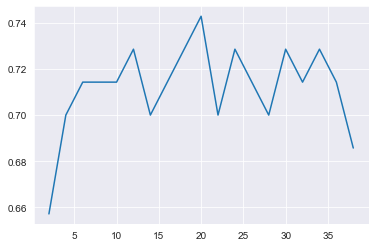

In [77]:
def distance(x_train, x_test_i):
    return np.sqrt( np.sum( np.square(x_train -x_test_i), axis=1)  )


def get_k_sorted_indices(distances, k):
    return pd.Series(distances).sort_values().reset_index()["index"][:k]


def predict_class(y_train, sorted_indices):
    return y_train[sorted_indices].mode()


def knn(x_train, y_train, x_test, k=3):
    return pd.Series([ predict_class(y_train, get_k_sorted_indices(distance(x_train,  x_test_i), k)).values[0] \
                       for x_test_i in x_test.values])

def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/ len(y_test)


allresults = []
for k in range(2, 40, 2):
    allresults.append(accuracy( knn(train.iloc[:, :-1], train.iloc[:, -1] , test.iloc[:, :-1] , k=k)\
                                   ,test.iloc[:, -1]))
    
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

plt.plot(list(range(2, 40, 2)), allresults)

## Case 2

c:\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


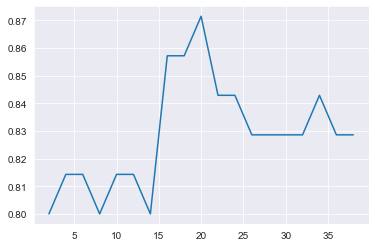

In [79]:
def distance(x_train, x_test_i):
    return np.sqrt( np.sum( np.square(x_train -x_test_i), axis=1)  )


def get_k_sorted_indices(distances, k):
    return pd.Series(distances).sort_values().reset_index()["index"][:k]


def predict_class(y_train, sorted_indices, distances):
    classes = y_train.unique()
    class_weight = { class_ : 0 for class_ in classes   }
    for index in sorted_indices:
        for class_ in classes:
            if y_train[index] == class_:
                class_weight[class_] += 1/(distances[index] * distances[index])
    
    return max(class_weight, key=class_weight.get)
    


def knn(x_train, y_train, x_test, k=3):
    return pd.Series([ predict_class(y_train, get_k_sorted_indices(distance(x_train,  x_test_i), k),\
                                     distance(x_train,  x_test_i))\
                                     for x_test_i in x_test.values])

def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/ len(y_test)


allresults = []
for k in range(2, 40, 2):
    allresults.append(accuracy( knn(train.iloc[:, :-1], train.iloc[:, -1] , test.iloc[:, :-1] , k=k)\
                                   ,test.iloc[:, -1]))
    
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

plt.plot(list(range(2, 40, 2)), allresults)

## Case 3

c:\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


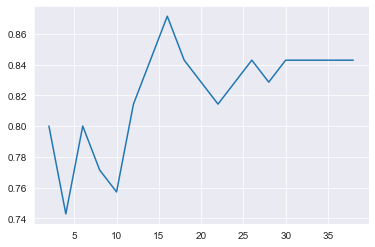

In [78]:
def calculateManhattenDistances(x_train, x_test_i):
    return  np.sum( np.abs(x_train -x_test_i), axis=1)  


def get_k_sorted_indices(distances, k):
    return pd.Series(distances).sort_values().reset_index()["index"][:k]


def predict_class(y_train, sorted_indices, distances):
    classes = y_train.unique()
    class_weight = { class_ : 0 for class_ in classes   }
    for index in sorted_indices:
        for class_ in classes:
            if y_train[index] == class_:
                class_weight[class_] += 1/(distances[index] * distances[index])
    
    return max(class_weight, key=class_weight.get)
    


def knn(x_train, y_train, x_test, k=3):
    return pd.Series([ predict_class(y_train, get_k_sorted_indices(calculateManhattenDistances(x_train,  x_test_i), k),\
                                     distance(x_train,  x_test_i))\
                                     for x_test_i in x_test.values])

def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/ len(y_test)


allresults = []
for k in range(2, 40, 2):
    allresults.append(accuracy( knn(train.iloc[:, :-1], train.iloc[:, -1] , test.iloc[:, :-1] , k=k)\
                                   ,test.iloc[:, -1]))
    
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

plt.plot(list(range(2, 40, 2)), allresults)

In [81]:
train = zcore_data.iloc[:400, :]
test = zcore_data.iloc[400:,: ]

### Case 1

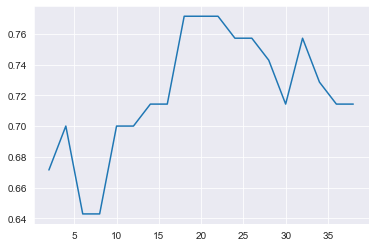

In [82]:
def distance(x_train, x_test_i):
    return np.sqrt( np.sum( np.square(x_train -x_test_i), axis=1)  )


def get_k_sorted_indices(distances, k):
    return pd.Series(distances).sort_values().reset_index()["index"][:k]


def predict_class(y_train, sorted_indices):
    return y_train[sorted_indices].mode()


def knn(x_train, y_train, x_test, k=3):
    return pd.Series([ predict_class(y_train, get_k_sorted_indices(distance(x_train,  x_test_i), k)).values[0] \
                       for x_test_i in x_test.values])

def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/ len(y_test)


allresults = []
for k in range(2, 40, 2):
    allresults.append(accuracy( knn(train.iloc[:, :-1], train.iloc[:, -1] , test.iloc[:, :-1] , k=k)\
                                   ,test.iloc[:, -1]))
    
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

plt.plot(list(range(2, 40, 2)), allresults)

### Case 2

c:\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


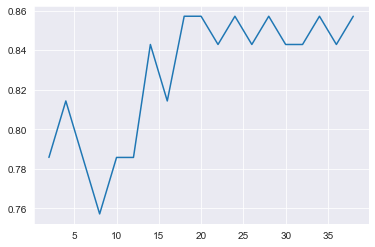

In [84]:
def distance(x_train, x_test_i):
    return np.sqrt( np.sum( np.square(x_train -x_test_i), axis=1)  )


def get_k_sorted_indices(distances, k):
    return pd.Series(distances).sort_values().reset_index()["index"][:k]


def predict_class(y_train, sorted_indices, distances):
    classes = y_train.unique()
    class_weight = { class_ : 0 for class_ in classes   }
    for index in sorted_indices:
        for class_ in classes:
            if y_train[index] == class_:
                class_weight[class_] += 1/(distances[index] * distances[index])
    
    return max(class_weight, key=class_weight.get)
    


def knn(x_train, y_train, x_test, k=3):
    return pd.Series([ predict_class(y_train, get_k_sorted_indices(distance(x_train,  x_test_i), k),\
                                     distance(x_train,  x_test_i))\
                                     for x_test_i in x_test.values])

def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/ len(y_test)


allresults = []
for k in range(2, 40, 2):
    allresults.append(accuracy( knn(train.iloc[:, :-1], train.iloc[:, -1] , test.iloc[:, :-1] , k=k)\
                                   ,test.iloc[:, -1]))
    
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

plt.plot(list(range(2, 40, 2)), allresults)

### Case 3

c:\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


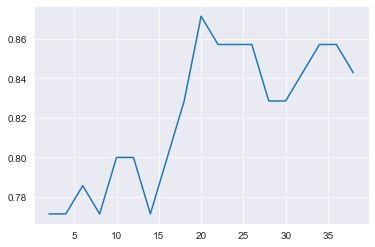

In [85]:
def calculateManhattenDistances(x_train, x_test_i):
    return  np.sum( np.abs(x_train -x_test_i), axis=1)  


def get_k_sorted_indices(distances, k):
    return pd.Series(distances).sort_values().reset_index()["index"][:k]


def predict_class(y_train, sorted_indices, distances):
    classes = y_train.unique()
    class_weight = { class_ : 0 for class_ in classes   }
    for index in sorted_indices:
        for class_ in classes:
            if y_train[index] == class_:
                class_weight[class_] += 1/(distances[index] * distances[index])
    
    return max(class_weight, key=class_weight.get)
    


def knn(x_train, y_train, x_test, k=3):
    return pd.Series([ predict_class(y_train, get_k_sorted_indices(calculateManhattenDistances(x_train,  x_test_i), k),\
                                     distance(x_train,  x_test_i))\
                                     for x_test_i in x_test.values])

def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/ len(y_test)


allresults = []
for k in range(2, 40, 2):
    allresults.append(accuracy( knn(train.iloc[:, :-1], train.iloc[:, -1] , test.iloc[:, :-1] , k=k)\
                                   ,test.iloc[:, -1]))
    
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

plt.plot(list(range(2, 40, 2)), allresults)